In [1]:
%load_ext autoreload
%autoreload 2

import scanpy as sc
sc.settings.set_figure_params(dpi=80, facecolor='white')
import ncem

datadir = ''

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '10xvisium/',
    data_origin='10xvisium',
    radius=0,
    n_rings=1,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])


Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.10it/s]

Loaded 1 images with complete data from 1 patients over 2688 cells with 4000 cell features and 15 distinct celltypes.
Mean of mean node degree per images across images: 0.000000

 Celldata metadata: {'lateral_resolution': 1.0, 'fn': 'visium_hne_adata.h5ad', 'image_col': 'in_tissue', 'cluster_col': 'cluster', 'cluster_col_preprocessed': 'cluster_preprocessed', 'patient_col': 'in_tissue', 'n_top_genes': None}


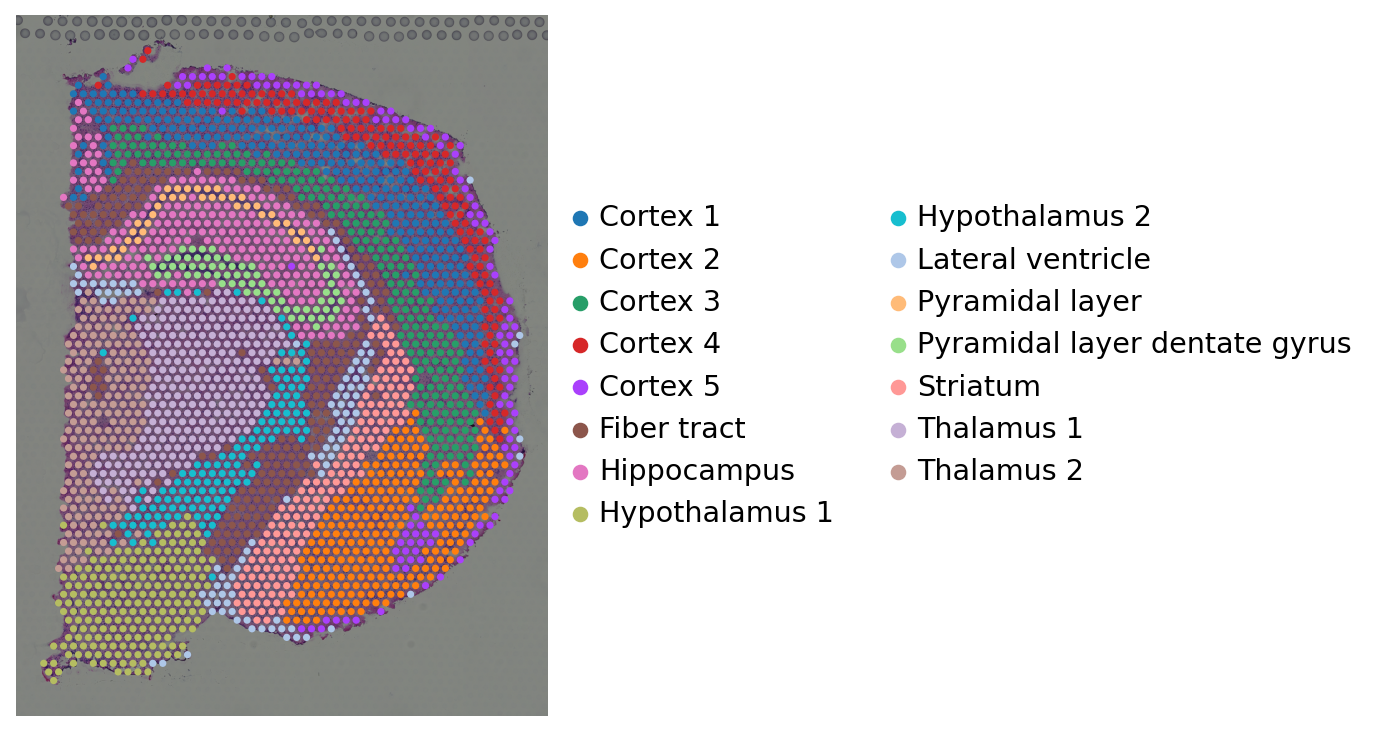

In [3]:
adata = interpreter.data.spatial(
    image_key= "1",
    spot_size=100,
    figsize=(8,8),
)

100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.88s/it]


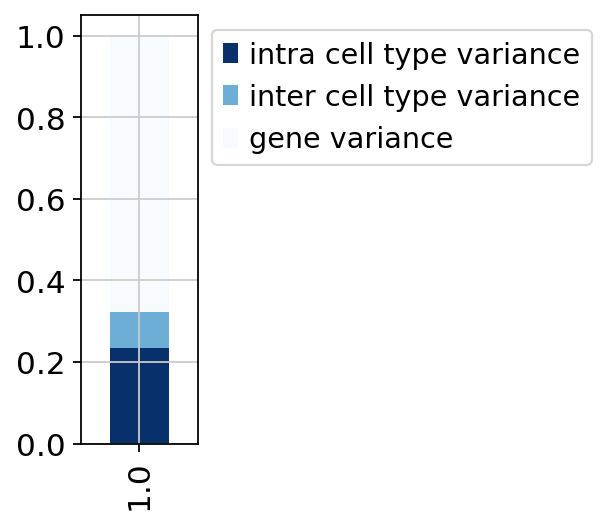

In [4]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, figsize=(4.,3.5)
)

In [5]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.234381
inter cell type variance    0.088433
gene variance               0.677186
dtype: float32

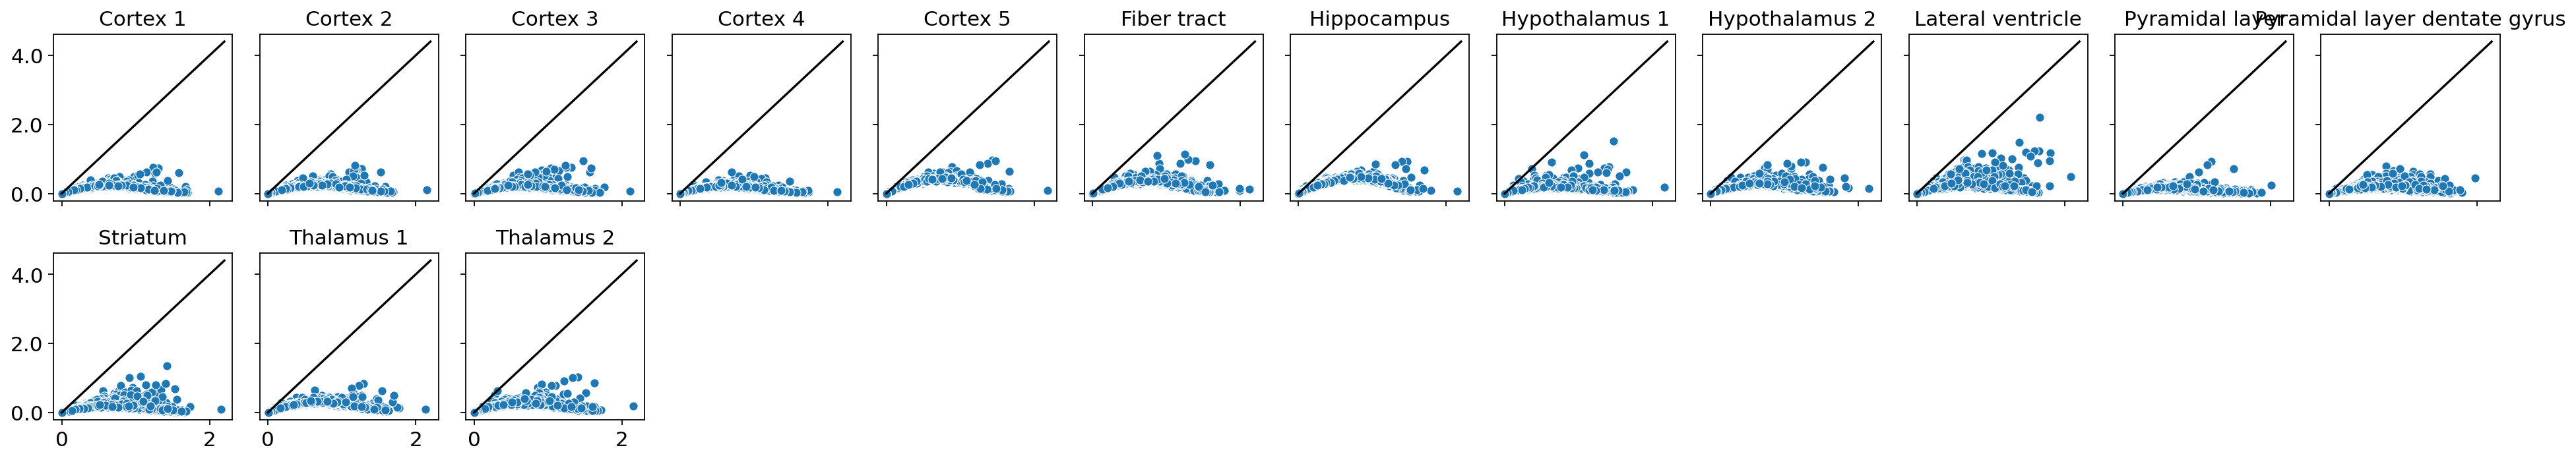

In [6]:
interpreter.data.noise_structure(min_x=0.0, max_x=2.2)